In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os
import numpy as np
import random as rn
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from plotly.subplots import make_subplots
import plotly.graph_objs as go
%matplotlib inline
import time

from keras import models
import tensorflow as tf
from tensorflow.keras import applications as app
from tensorflow.keras.models import Sequential # Sequential model initialization
import tensorflow.keras.models as Models
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,AveragePooling2D
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tqdm.keras import TqdmCallback
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator # For data pipeline building
from functools import partial
import keras
from keras import backend as K # for checking f1 score

In [4]:
train_folder = '/content/drive/MyDrive/HummingBirds/train'
val_folder = '/content/drive/MyDrive/HummingBirds/valid'
test_folder = '/content/drive/MyDrive/HummingBirds/test'

In [17]:
# Data preprocessing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [18]:
test_valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [19]:
# Load datasets
train_data = train_datagen.flow_from_directory(
    train_folder,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

valid_data = test_valid_datagen.flow_from_directory(
    val_folder,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_valid_datagen.flow_from_directory(
    test_folder,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 400 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [21]:
from tensorflow import keras
from tensorflow.keras import layers, models

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Train the model
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=20,
    batch_size=32
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the model
model.save("hummingbird_classifier.h5")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.2225 - loss: 1.6991 - val_accuracy: 0.2500 - val_loss: 1.3980
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.2916 - loss: 1.3538 - val_accuracy: 0.2500 - val_loss: 1.3379
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.3868 - loss: 1.2658 - val_accuracy: 0.4375 - val_loss: 1.3935
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.4284 - loss: 1.2366 - val_accuracy: 0.3500 - val_loss: 1.3599
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.3832 - loss: 1.2224 - val_accuracy: 0.4625 - val_loss: 1.6178
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.4195 - loss: 1.2716 - val_accuracy: 0.5000 - val_loss: 1.2956
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.4316 - loss: 1.2295 - val_accuracy: 0.4000 - val_loss: 1.2863
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4924 - loss: 1.1921 - val_accuracy: 0.5750 - val_loss: 1.2387
Epo

Test Accuracy: 0.79


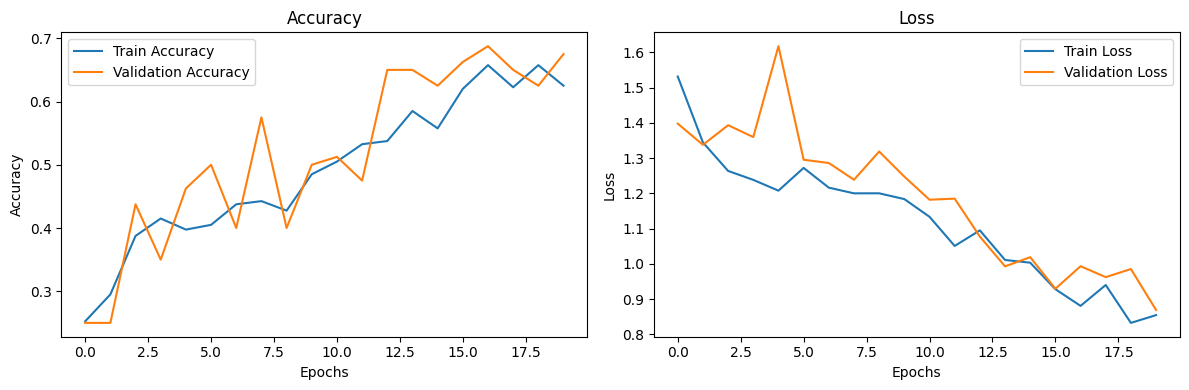

In [23]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [24]:
# Load the trained model
model = tf.keras.models.load_model("hummingbird_classifier.h5")
# Load class names
class_indices = train_data.class_indices  # Use the class indices from the training generator
class_names = {v: k for k, v in class_indices.items()}  # Reverse the dictionary


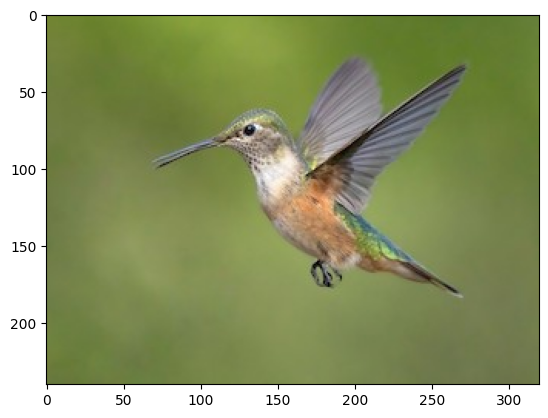

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: Broadtailed_female (Confidence: 0.40)


In [52]:
from tensorflow.keras.preprocessing import image
# Function to preprocess and predict
def predict_hummingbird_class(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(128, 128))  # Resize to match the input size of the model
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = img_array / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)  # Get the index of the highest probability
    predicted_class_name = class_names[predicted_class_index]
    print(f"Predicted Class: {predicted_class_name} (Confidence: {predictions[0][predicted_class_index]:.2f})")
    return predicted_class_name

# Example usage
image_path = "bird2.jpeg"
plt.imshow(image.load_img(image_path))
plt.show()
predicted_class = predict_hummingbird_class(image_path)